In [1]:
from src import *
import random





In [2]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx

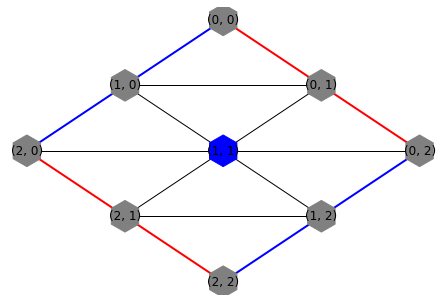

In [4]:
h = Hex((3,3))
h.set_encoder(HexEncoder(padding=2))
h.make_action((1,1))
h.display_board()

In [3]:
hex = Hex((3,3))
encoder = HexEncoder(padding=2)
hex.set_encoder(encoder)

actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(155,128,9),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )

critic = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='SGD',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )

critic2 = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='SGD',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
            
agent = Agent(actor, critic)  

In [16]:
actor = Actor(learning_rate=0.01,
                nn_loss='mse',
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/second_with_critic_24.h5'
             )

critic = Critic(learning_rate=0.01,
                nn_loss='mse',
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/second_with_critic__critic_24 (1).h5'
             )

In [19]:
e = Hex((3,3))
e.set_encoder(HexEncoder(padding=2))
mcts = MCTS(actor, e, critic)

In [20]:
%time mcts.search(300, rollout_prob=0)

CPU times: user 1.76 s, sys: 21.5 ms, total: 1.78 s
Wall time: 1.88 s


{(0, 2): 0.13,
 (2, 1): 0.11333333333333334,
 (0, 0): 0.11666666666666667,
 (2, 2): 0.11,
 (0, 1): 0.10333333333333335,
 (2, 0): 0.14666666666666667,
 (1, 1): 0.1,
 (1, 2): 0.08666666666666667,
 (1, 0): 0.09333333333333334}

In [18]:
e = Hex((3,3))
e.set_encoder(HexEncoder(padding=2))
#e.make_action((1,1))
e.make_action((2,2))
#e.make_action((0,2))
#e.make_action((1,0))
#e.make_action((2,0))
critic.get_value(e)

-0.9088952392339706

In [5]:
test = [(Hex((3,3)),'bla', 1)]
critic.end_of_episode(test, epochs=10)

TypeError: copy_model() missing 1 required positional argument: 'loss'

In [196]:
test = [(Hex((3,3)), 'bla', 0)]
critic.end_of_episode(test,epochs=20)

first replay:  3
Epoch 1/20
1/1 [==============================] - 0s 6ms/step - loss: 0.1037 - accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 27ms/step - loss: 0.1025 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 24ms/step - loss: 0.1013 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 59ms/step - loss: 0.1001 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 37ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.0978 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.0967 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 9ms/step - loss: 0.0934 - accuracy: 1.0000
Epoch 11/20
1/1 

In [213]:
critic2.model = clone_model(critic.model)
critic2.model.compile(optimizer=critic.model.optimizer, loss='mse', metrics=['accuracy'])
#critic2.model.set_weights(critic.model.get_weights())

In [147]:
from tensorflow.keras.models import clone_model

critic2.model = clone_model(critic.model)
critic2.model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [148]:
critic2.model.predict(critic2.encoder.encode(Hex((3,3))))

array([[0.52101487]], dtype=float32)

In [197]:
critic.model.predict(critic.encoder.encode(Hex((3,3))))

array([[0.28785902]], dtype=float32)

In [144]:
test = [(Hex((3,3)), 'bla', 0)]
critic2.end_of_episode(test, epochs=10)

first replay:  3
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.2357 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0842 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 5.0105e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 8.1481e-05 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 1.4545e-05 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 2.8585e-06 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 6.0968e-07 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.4119e-07 - accuracy: 1.

In [90]:
critic.model.predict(critic.encoder.encode(Hex((3,3))))

array([[0.02627197]], dtype=float32)

In [4]:
t = agent.train_agent(hex, n_episodes=10,rollout_start_prob=1, rollout_end_prob=1, n_simulations=20, epochs=10, M=1, file_path="drive/MyDrive/aiprog_models/critic2")

  0%|          | 0/10 [00:00<?, ?it/s]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 1s 980ms/step - loss: 2.2203 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 73ms/step - loss: 1.9948 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 1.8330 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 25ms/step - loss: 1.7724 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7326 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 1.6715 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 1.6300 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.6061 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5733 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 1.5372 - acc

 10%|█         | 1/10 [00:09<01:23,  9.29s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 40ms/step - loss: 2.0017 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 1.9443 - accuracy: 0.4667
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8873 - accuracy: 0.4667
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 1.8610 - accuracy: 0.4667
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1.8453 - accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 1.8283 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 1.8055 - accuracy: 0.2667
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7851 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 1.7729 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7680 - accuracy

 20%|██        | 2/10 [00:14<01:05,  8.19s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 46ms/step - loss: 1.9272 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 1.9009 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 1.8724 - accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 1.8499 - accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 1.8313 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 1.8120 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7920 - accuracy: 0.4167
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7743 - accuracy: 0.4583
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 1.7601 - accuracy: 0.4583
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7436 - accur

 30%|███       | 3/10 [00:20<00:51,  7.41s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 1.8612 - accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 1.8297 - accuracy: 0.4062
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 1.7978 - accuracy: 0.3438
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 1.7750 - accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7590 - accuracy: 0.2812
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7443 - accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7259 - accuracy: 0.2812
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7047 - accuracy: 0.3125
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 1.6850 - accuracy: 0.4375
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 1.6695 - accur

 40%|████      | 4/10 [00:25<00:39,  6.66s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 1.8034 - accuracy: 0.4103
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7727 - accuracy: 0.3077
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7517 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7397 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 1.7203 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 1.6990 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1.6861 - accuracy: 0.3846
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 1.6769 - accuracy: 0.3846
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.6628 - accuracy: 0.3590
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 1.6485 - accuracy:

 50%|█████     | 5/10 [00:31<00:31,  6.38s/it]


In [44]:
r =agent.train_agent(hex, n_episodes=10,rollout_start_prob=1, rollout_end_prob=1, n_simulations=20, epochs=10, M=1, file_path="drive/MyDrive/aiprog_models/critic2")

  0%|          | 0/10 [00:00<?, ?it/s]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 1s 619ms/step - loss: 2.1968 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 1.9414 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 1.8148 - accuracy: 0.4444
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 1.7493 - accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.6941 - accuracy: 0.5556
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 1.6374 - accuracy: 0.5556
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1.5900 - accuracy: 0.5556
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.5497 - accuracy: 0.7778
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5123 - accuracy: 0.7778
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 1.4739 - accurac

 10%|█         | 1/10 [00:05<00:46,  5.20s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 7ms/step - loss: 1.9254 - accuracy: 0.4118
Epoch 2/10
1/1 [==============================] - 0s 81ms/step - loss: 1.8541 - accuracy: 0.4706
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 1.7897 - accuracy: 0.4706
Epoch 4/10
1/1 [==============================] - 0s 25ms/step - loss: 1.7390 - accuracy: 0.4706
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7086 - accuracy: 0.4706
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 1.6891 - accuracy: 0.4706
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 1.6732 - accuracy: 0.5294
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.6592 - accuracy: 0.4118
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 1.6450 - accuracy: 0.4118
Epoch 10/10
1/1 [==============================] - 0s 23ms/step - loss: 1.6290 - accu

 20%|██        | 2/10 [00:08<00:36,  4.53s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 1.8208 - accuracy: 0.39 - 0s 39ms/step - loss: 1.8208 - accuracy: 0.3913
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 1.7949 - accuracy: 0.4783
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 1.7734 - accuracy: 0.4348
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 1.7534 - accuracy: 0.4348
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7325 - accuracy: 0.4783
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7146 - accuracy: 0.5652
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 1.7002 - accuracy: 0.5217
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.6859 - accuracy: 0.4783
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.6727 - accuracy: 0.4783
Epoch 10/10
1/1 [============================

 30%|███       | 3/10 [00:10<00:26,  3.79s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 11ms/step - loss: 1.7969 - accuracy: 0.4516
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 1.7652 - accuracy: 0.3871
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 1.7415 - accuracy: 0.3871
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 1.7164 - accuracy: 0.3548
Epoch 5/10
1/1 [==============================] - 0s 25ms/step - loss: 1.6903 - accuracy: 0.4194
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 1.6667 - accuracy: 0.4194
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 1.6474 - accuracy: 0.2903
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.6287 - accuracy: 0.3871
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1.6111 - accuracy: 0.4839
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 1.5958 - accu

 40%|████      | 4/10 [00:14<00:22,  3.83s/it]

--------------Actor training--------------
Epoch 1/10
1/1 [==============================] - 0s 12ms/step - loss: 1.6910 - accuracy: 0.5128
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 1.6557 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 1.6298 - accuracy: 0.3590
Epoch 4/10
1/1 [==============================] - 0s 41ms/step - loss: 1.6046 - accuracy: 0.3846
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 1.5766 - accuracy: 0.4103
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 1.5452 - accuracy: 0.4359
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 1.5258 - accuracy: 0.4359
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 1.5182 - accuracy: 0.4359
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 1.5020 - accuracy: 0.4103
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 1.4856 - accu

 50%|█████     | 5/10 [00:19<00:19,  3.93s/it]


In [62]:
r

[(<src.hex.Hex at 0x144f16610>,
  {(2, 0): 0.6000000000000001,
   (1, 1): 0.05,
   (0, 2): 0.05,
   (2, 1): 0.05,
   (0, 1): 0.05,
   (0, 0): 0.05,
   (2, 2): 0.05,
   (1, 0): 0.05,
   (1, 2): 0.05},
  1),
 (<src.hex.Hex at 0x1450c99d0>,
  {(1, 2): 0.65,
   (2, 1): 0.05,
   (0, 1): 0.05,
   (2, 0): 0.05,
   (0, 2): 0.05,
   (1, 0): 0.05,
   (1, 1): 0.05,
   (2, 2): 0.05},
  0),
 (<src.hex.Hex at 0x144f41310>,
  {(2, 2): 0.8125,
   (0, 2): 0.03125,
   (2, 1): 0.03125,
   (1, 0): 0.03125,
   (0, 1): 0.03125,
   (2, 0): 0.03125,
   (1, 1): 0.03125},
  1),
 (<src.hex.Hex at 0x144f288e0>,
  {(2, 0): 0.888888888888889,
   (1, 0): 0.022222222222222223,
   (0, 1): 0.022222222222222223,
   (1, 1): 0.022222222222222223,
   (2, 1): 0.022222222222222223,
   (0, 2): 0.022222222222222223},
  0),
 (<src.hex.Hex at 0x144f0c790>,
  {(0, 2): 0.23728813559322035,
   (2, 1): 0.288135593220339,
   (1, 1): 0.1864406779661017,
   (1, 0): 0.2711864406779661,
   (0, 1): 0.01694915254237288},
  1),
 (<src.hex.H

In [45]:
critic_replay = [(entry[0], entry[2]) for entry in r]
clean = []
for entry in critic_replay:
    if entry[0].equals(critic_replay[3][0]):
        clean.append(entry)
clean

[(<src.hex.Hex at 0x144f288e0>, 0)]

In [8]:
def convert_to_network_input(replay_buffer, encoder):
        x = tf.concat([encoder.encode(entry[0]) for entry in replay_buffer], 0)  
        print("first replay: ", len(replay_buffer[0]))      
        y = tf.convert_to_tensor([entry[1] for entry in replay_buffer])
        return x,y

In [23]:
#test1 = convert_to_network_input(critic_replay, encoder)
test2 = critic.convert_to_network_input(t)

first replay:  3


In [26]:
critic2 = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
critic2.model.fit(test2[0],test2[1], epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 13ms/step - loss: 0.2552 - accuracy: 0.4399
Epoch 2/10
2/2 [==============================] - 0s 18ms/step - loss: 0.2342 - accuracy: 0.5847
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 0.2169 - accuracy: 0.6547
Epoch 4/10
2/2 [==============================] - 0s 18ms/step - loss: 0.1983 - accuracy: 0.7493
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.1758 - accuracy: 0.8023
Epoch 6/10
2/2 [==============================] - 0s 18ms/step - loss: 0.1692 - accuracy: 0.7994
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.1421 - accuracy: 0.8695
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 0.1332 - accuracy: 0.8382
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 0.1131 - accuracy: 0.8590
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0948 - accuracy: 0.8524


In [32]:
t

[(<src.hex.Hex at 0x13a20d2e0>,
  {(0, 0): 0.15000000000000002,
   (1, 1): 0.1,
   (2, 2): 0.1,
   (0, 1): 0.1,
   (0, 2): 0.15000000000000002,
   (2, 1): 0.1,
   (1, 0): 0.1,
   (2, 0): 0.1,
   (1, 2): 0.1},
  1),
 (<src.hex.Hex at 0x13a1c4460>,
  {(2, 2): 0.14285714285714285,
   (0, 2): 0.14285714285714285,
   (0, 0): 0.14285714285714285,
   (1, 2): 0.09523809523809523,
   (1, 0): 0.09523809523809523,
   (2, 1): 0.14285714285714285,
   (0, 1): 0.14285714285714285,
   (2, 0): 0.09523809523809523},
  0),
 (<src.hex.Hex at 0x13a3cfb50>,
  {(0, 1): 0.14285714285714285,
   (2, 2): 0.14285714285714285,
   (0, 0): 0.14285714285714285,
   (2, 1): 0.14285714285714285,
   (0, 2): 0.14285714285714285,
   (1, 2): 0.14285714285714285,
   (1, 0): 0.14285714285714285},
  1),
 (<src.hex.Hex at 0x13a3cf940>,
  {(0, 2): 0.18181818181818182,
   (0, 1): 0.18181818181818182,
   (2, 1): 0.18181818181818182,
   (1, 2): 0.13636363636363635,
   (1, 0): 0.13636363636363635,
   (0, 0): 0.18181818181818182},
  

In [40]:
critic2 = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
for i in range(15):
    print("-------------")
    for j in range(int(len(t)/5)):
        index = int (random.random()*len(test2[1]))
        l = list(t[index])
        l[2] = 1 if l[2] == 0 else 0
        t[index] = tuple(l)
    x,y = critic2.convert_to_network_input(t)
    critic2.model.fit(x,y, epochs=10)

-------------
first replay:  3
Epoch 1/10
2/2 [==============================] - 1s 13ms/step - loss: 0.2423 - accuracy: 0.4758
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.2367 - accuracy: 0.6547
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 0.2120 - accuracy: 0.6831
Epoch 4/10
2/2 [==============================] - 0s 17ms/step - loss: 0.2318 - accuracy: 0.6585
Epoch 5/10
2/2 [==============================] - 0s 14ms/step - loss: 0.2044 - accuracy: 0.7673
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 0.2106 - accuracy: 0.6443
Epoch 7/10
2/2 [==============================] - 0s 17ms/step - loss: 0.2014 - accuracy: 0.6689
Epoch 8/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1901 - accuracy: 0.7256
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 0.1856 - accuracy: 0.8098
Epoch 10/10
2/2 [==============================] - 0s 18ms/step - loss: 0.1693 - accuracy: 0.848

In [28]:
critic.model.evaluate(test2[0],test2[1])

2/2 [==============================] - 0s 30ms/step - loss: 0.3159 - accuracy: 0.6809


[0.3158625066280365, 0.6808510422706604]

In [27]:
critic.model.fit(test2[0],test2[1], epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3654 - accuracy: 0.6170
Epoch 2/10
2/2 [==============================] - 0s 14ms/step - loss: 0.3661 - accuracy: 0.6170
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 0.3560 - accuracy: 0.6383
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 0.3275 - accuracy: 0.6383
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3379 - accuracy: 0.5957
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.6809
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 0.3497 - accuracy: 0.6170
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3316 - accuracy: 0.6596
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 0.2915 - accuracy: 0.6809
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 0.3690 - accuracy: 0.5957


In [78]:
critic = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
#critic.model.fit(test2[0],test2[1], epochs=10)
critic.end_of_episode(t, epochs=10)

first replay:  3
Epoch 1/10
1/1 [==============================] - 1s 912ms/step - loss: 0.2496 - accuracy: 0.5217
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2132 - accuracy: 0.6957
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.6957
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 0.1801 - accuracy: 0.6957
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1597 - accuracy: 0.6957
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1418 - accuracy: 0.8043
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 0.1246 - accuracy: 0.8913
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.1062 - accuracy: 0.9130
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.0911 - accuracy: 0.9130
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0766 - accuracy: 0.9565


In [49]:
critic = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
x,y = convert_to_network_input(critic_replay, HexEncoder(padding=2))
critic.model.fit(x,y,epochs=100)

first replay:  2
Epoch 1/100
2/2 [==============================] - 2s 8ms/step - loss: 0.2536 - accuracy: 0.4271
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 0.2346 - accuracy: 0.5694
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2097 - accuracy: 0.6250
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1963 - accuracy: 0.7361
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.1809 - accuracy: 0.7639
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1741 - accuracy: 0.7674
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1537 - accuracy: 0.8854
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1339 - accuracy: 0.8021
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1136 - accuracy: 0.8264
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0954 - accuracy: 0.9375
Epoch

In [51]:
def convert_to_network_input_actor(replay_buffer, encoder):
        x = tf.concat([encoder.encode(entry[0]) for entry in replay_buffer], 0)  
        print("first replay: ", len(replay_buffer[0]))      
        y = tf.convert_to_tensor([entry[1] for entry in replay_buffer])
        return x,y

In [56]:
x,y = actor.convert_to_network_input(r)

In [58]:
actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(155,128,9),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor.model.fit(x,y, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 18ms/step - loss: 2.1874 - accuracy: 0.1736
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 2.0969 - accuracy: 0.2396
Epoch 3/500
2/2 [==============================] - 0s 17ms/step - loss: 2.0251 - accuracy: 0.1979
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 1.9366 - accuracy: 0.2708
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 1.9276 - accuracy: 0.3264
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 1.8257 - accuracy: 0.4097
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 1.7683 - accuracy: 0.4340
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 1.7303 - accuracy: 0.3611
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 1.7006 - accuracy: 0.3438
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 1.6212 - accuracy: 0.3993
Epoch 11/500
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 1.2637 - accuracy: 0.6389
Epoch 85/500
2/2 [==============================] - 0s 13ms/step - loss: 1.2455 - accuracy: 0.6736
Epoch 86/500
2/2 [==============================] - 0s 13ms/step - loss: 1.2592 - accuracy: 0.6354
Epoch 87/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2647 - accuracy: 0.6875
Epoch 88/500
2/2 [==============================] - 0s 12ms/step - loss: 1.3143 - accuracy: 0.6771
Epoch 89/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2899 - accuracy: 0.7014
Epoch 90/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2789 - accuracy: 0.6146
Epoch 91/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2618 - accuracy: 0.6771
Epoch 92/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2314 - accuracy: 0.6493
Epoch 93/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2914 - accuracy: 0.7257
Epoch 94/500
2/2 [=========

2/2 [==============================] - 0s 15ms/step - loss: 1.2298 - accuracy: 0.7014
Epoch 248/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2903 - accuracy: 0.6528
Epoch 249/500
2/2 [==============================] - 0s 21ms/step - loss: 1.2629 - accuracy: 0.5799
Epoch 250/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2202 - accuracy: 0.7465
Epoch 251/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2805 - accuracy: 0.6632
Epoch 252/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2835 - accuracy: 0.6597
Epoch 253/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2326 - accuracy: 0.6493
Epoch 254/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2496 - accuracy: 0.6146
Epoch 255/500
2/2 [==============================] - 0s 15ms/step - loss: 1.2434 - accuracy: 0.6840
Epoch 256/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2727 - accuracy: 0.7361
Epoch 257/500
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 1.2359 - accuracy: 0.7014
Epoch 412/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2717 - accuracy: 0.6215
Epoch 413/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2590 - accuracy: 0.7292
Epoch 414/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2689 - accuracy: 0.8229
Epoch 415/500
2/2 [==============================] - 0s 15ms/step - loss: 1.2852 - accuracy: 0.7361
Epoch 416/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2603 - accuracy: 0.5903
Epoch 417/500
2/2 [==============================] - 0s 8ms/step - loss: 1.2436 - accuracy: 0.6979
Epoch 418/500
2/2 [==============================] - 0s 12ms/step - loss: 1.2636 - accuracy: 0.7708
Epoch 419/500
2/2 [==============================] - 0s 9ms/step - loss: 1.2467 - accuracy: 0.7014
Epoch 420/500
2/2 [==============================] - 0s 13ms/step - loss: 1.2900 - accuracy: 0.6979
Epoch 421/500
2/2

In [50]:
[critic.model(encoder.encode(critic_replay[i][0])).numpy()[0,0] for i in range(len(critic_replay))]

[0.31931716,
 0.4001634,
 0.9750284,
 0.03995979,
 0.9683081,
 0.027094752,
 0.9933101,
 0.025250107,
 0.9878212,
 0.31931716,
 0.99162185,
 0.023042947,
 0.9951628,
 0.0027646422,
 0.9987076,
 0.011066616,
 0.9929225,
 0.31931716,
 0.4001634,
 0.035075635,
 0.98216295,
 0.011441737,
 0.99415225,
 0.0077872872,
 0.99448544,
 0.31931716,
 0.97770953,
 0.035079688,
 0.99649477,
 0.007207632,
 0.99730206,
 0.31931716,
 0.98780125,
 0.032603353,
 0.9960477,
 0.00496462,
 0.9991495,
 0.0041011274,
 0.9898341,
 0.31931716,
 0.4001634,
 0.9667779,
 0.06910044,
 0.9892676,
 0.029439956,
 0.98895484,
 0.018921554,
 0.9934065]

In [37]:
critic = Critic(learning_rate=0.001,
             nn_shape=(155,128,1),
             filters=(128,),
             kernel_sizes=((3,3),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
encoder = HexEncoder(padding=2)
h1 = Hex((3,3))
h1.set_encoder(encoder)
h1.make_action((1,1))
h2 = Hex((3,3))
h2.set_encoder(encoder)
r = [(h1,1), (h2,0)]
def convert_to_network_input(replay_buffer, encoder):
        x = tf.concat([encoder.encode(entry[0]) for entry in replay_buffer], 0) 
        print("first replay: ", len(replay_buffer[0]))      
        y = tf.convert_to_tensor([entry[1] for entry in replay_buffer])
        return x,y
x,y = convert_to_network_input(r, encoder)

critic.model.fit(x,y, epochs=100)

first replay:  2
Epoch 1/100
1/1 [==============================] - 1s 701ms/step - loss: 0.2531 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2405 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2298 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2179 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1834 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1622 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1425 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1203 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 

In [39]:
critic.model(encoder.encode(h2))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00038484]], dtype=float32)>

In [4]:
critic.get_value(h)

0.01183021068572998

In [10]:
h = Hex((3,3))
encoder = HexEncoder(padding=2)
h.set_encoder(encoder)
critic = Critic(learning_rate=0.01,
              encoder=encoder,
               load_from='Models/Ctest_3_3__critic_200.h5'
             )

OSError: SavedModel file does not exist at: Models/Ctest_3_3__critic_200.h5/{saved_model.pbtxt|saved_model.pb}

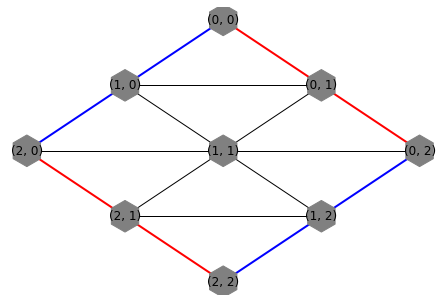

1.0

In [7]:
h.display_board()
critic.get_value(h)

In [8]:
h.make_action((1,1))

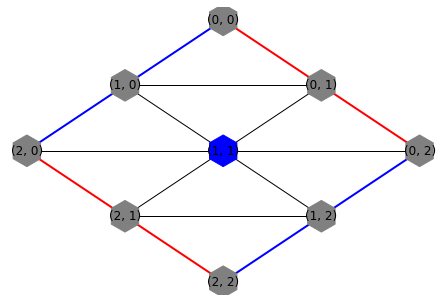

1.0

In [9]:
h.display_board()
critic.get_value(h)

In [14]:
h = Hex((3,3))
encoder = HexEncoder(padding=2)
h.set_encoder(encoder)


actor = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/devtest_3_3200.h5'
             )

mcts = MCTS(actor, h, critic=critic)



In [15]:
%time mcts.search(300, rollout_prob=1)

CPU times: user 2.46 s, sys: 37.2 ms, total: 2.5 s
Wall time: 3.25 s


{(0, 2): 0.0033333333333333335,
 (2, 0): 0.8300000000000001,
 (0, 1): 0.0033333333333333335,
 (1, 2): 0.07666666666666667,
 (2, 2): 0.05666666666666667,
 (0, 0): 0.02,
 (2, 1): 0.0033333333333333335,
 (1, 0): 0.0033333333333333335,
 (1, 1): 0.0033333333333333335}

In [8]:
import cProfile

In [9]:
cProfile.run('mcts.search(100)', sort='cumtime')

         779269 function calls (775271 primitive calls) in 2.488 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.496    2.496 {built-in method builtins.exec}
        1    0.000    0.000    2.496    2.496 <string>:1(<module>)
        1    0.000    0.000    2.496    2.496 monte_carlo_ts.py:190(search)
      100    0.001    0.000    2.496    0.025 monte_carlo_ts.py:171(perform_simulation_old)
      100    0.007    0.000    2.340    0.023 monte_carlo_ts.py:79(_rollout)
      422    0.011    0.000    1.934    0.005 actor.py:59(get_action)
 2532/422    0.108    0.000    1.890    0.004 base_layer.py:901(__call__)
      422    0.004    0.000    1.619    0.004 sequential.py:354(call)
      422    0.003    0.000    1.615    0.004 functional.py:406(call)
      422    0.052    0.000    1.612    0.004 functional.py:516(_run_internal_graph)
     1266    0.004    0.000    0.640    0.001 core.py:1206(call

In [4]:
a = np.zeros((9,7,7))

In [5]:
import tensorflow as tf

In [18]:
b=np.zeros((7,7))

In [19]:
b = np.expand_dims(b, axis=2)

In [20]:
b.shape

(7, 7, 1)

In [6]:
tf.convert_to_tensor(a)


<tf.Tensor: shape=(9, 7, 7), dtype=float64, numpy=
array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

In [ ]:
mcts.search(10)

In [ ]:
encoder = HexEncoder(padding=2)

In [5]:
e = Hex((3,3))
e.set_encoder(encoder)
e.copy()

i hex konst
i hex konst
kall
i hex konst
kall
i hex konst
Encoder for board with size  (7, 7)  is none
not none


In [6]:
e.copy()

kall
i hex konst
kall
i hex konst
hehehe
not none


In [3]:
d = Diamond((3,3))

In [4]:
d.neighbours


{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 0), (1, 1)],
 (0, 2): [(0, 1), (1, 1), (1, 2)],
 (1, 0): [(0, 0), (0, 1), (1, 1), (2, 0)],
 (1, 1): [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)],
 (1, 2): [(0, 2), (1, 1), (2, 1), (2, 2)],
 (2, 0): [(1, 0), (1, 1), (2, 1)],
 (2, 1): [(1, 1), (1, 2), (2, 0), (2, 2)],
 (2, 2): [(1, 2), (2, 1)]}

In [5]:
d.cells

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
e = Hex((3,3))

In [7]:
e.neighbours

{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 0), (1, 1)],
 (0, 2): [(0, 1), (1, 1), (1, 2)],
 (1, 0): [(0, 0), (0, 1), (1, 1), (2, 0)],
 (1, 1): [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)],
 (1, 2): [(0, 2), (1, 1), (2, 1), (2, 2)],
 (2, 0): [(1, 0), (1, 1), (2, 1)],
 (2, 1): [(1, 1), (1, 2), (2, 0), (2, 2)],
 (2, 2): [(1, 2), (2, 1)]}

In [8]:
e.board

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

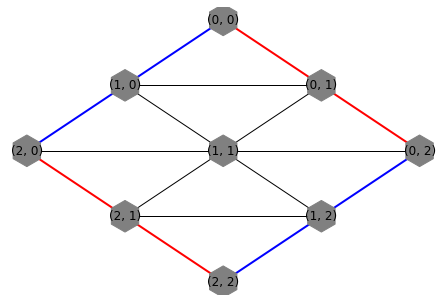

In [9]:
e.display_board()

In [10]:
e.make_action((1,2))

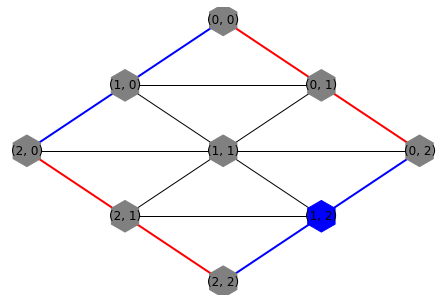

In [11]:
e.display_board()

In [12]:
e.get_winner()

0

In [13]:
e.value_of((2,2))

0.0

In [4]:
import cProfile

In [5]:
cProfile.run('e.copy()', sort='cumtime')

         16 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 hex.py:86(copy)
        1    0.000    0.000    0.000    0.000 hex.py:54(__init__)
        1    0.000    0.000    0.000    0.000 hexagonal_grid.py:123(copy)
        1    0.000    0.000    0.000    0.000 hexagonal_grid.py:111(__init__)
        1    0.000    0.000    0.000    0.000 hexagonal_grid.py:46(__init__)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copy)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 function_base.py:714(copy)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.arra

In [27]:
h = Hex((3,3))
h.make_action((0,0))

In [28]:
h.get_winner()

TypeError: get_cell() missing 1 required positional argument: 'column'

In [3]:
env = Nim(n=4, k=2)

In [4]:
class target_pol:
    def get_action(self, env):
        return random.choice(env.available_actions())
    
t = target_pol()
t.get_action(env)

1

In [10]:
random.seed(0)
env = Nim(n=2, k=2)
mcts = MCTS(target_pol(), env)
mcts.search(30, c=1, old=False)

AttributeError: 'target_pol' object has no attribute 'get_actions'

In [6]:
G, edge_labels = mcts.visualize_tree_nim()

children:  [<src.node.Node object at 0x13d258ca0>, <src.node.Node object at 0x13d258220>]
er her
remianing- child.action 0
er her
remianing- child.action 1
children:  [<src.node.Node object at 0x13d258880>]
er her
remianing- child.action 0
unique labels:  2


In [7]:
len(G.nodes())

4

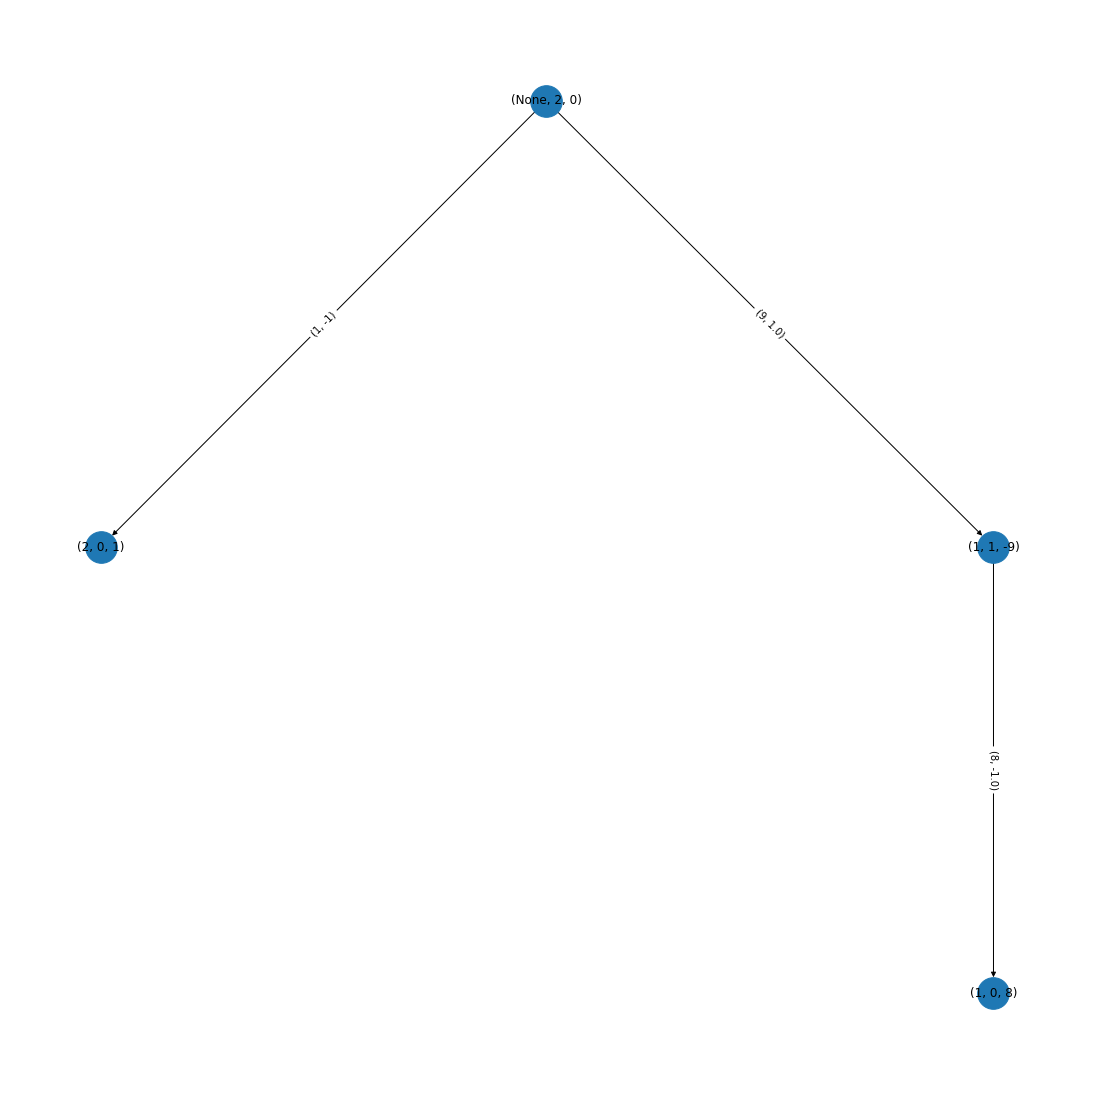

In [8]:
plt.figure(figsize=(15,15))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1], node[2]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [23]:
mcts.set_new_root(2)

In [24]:
G, edge_labels = mcts.visualize_tree_nim()

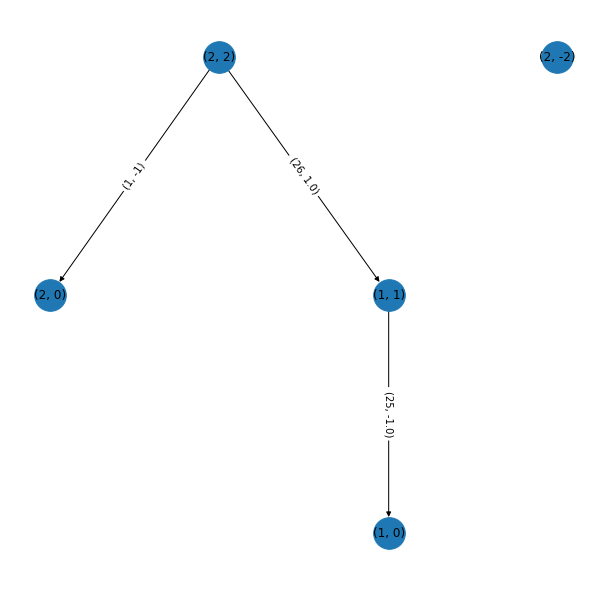

In [25]:
plt.figure(figsize=(8,8))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [26]:
random.seed(0)
mcts.search(25)


{2: 0.019230769230769232, 1: 0.9807692307692308}

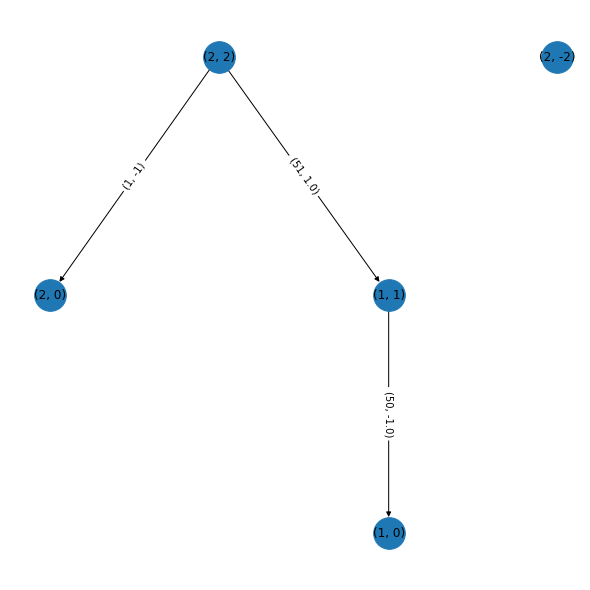

In [27]:
G, edge_labels = mcts.visualize_tree_nim()
plt.figure(figsize=(8,8))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
e = Hex((4,4))


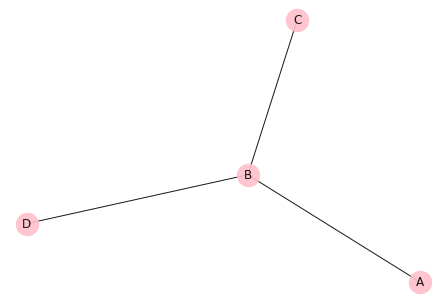

In [14]:
edges = [['A','B'],['B','C'],['B','D']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()    
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})





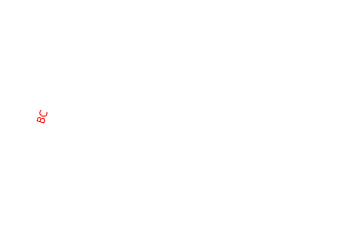

In [15]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
('B','C'):'BC',('B','D'):'BD'},font_color='red')
plt.axis('off')
plt.show()

In [24]:
mcts.perform_simulation()

actions: [1]


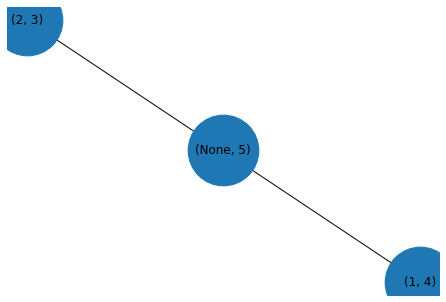

In [11]:
mcts.visualize_tree()

In [5]:
mcts.search(10)

actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [2]
actions: [1]


{1: 0.9, 2: 0.1}

In [6]:
env.make_action(1)
mcts.set_new_root(1)

In [7]:
mcts.search(10)

actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [2]


{1: 0.8333333333333333, 2: 0.16666666666666666}

In [8]:
env.make_action(1)
mcts.set_new_root(1)

In [9]:
mcts.search(10)

actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1]
actions: [1, 2]
actions: [1]
actions: [1]


{2: 0.875, 1: 0.125}

In [10]:
env.make_action(2)
mcts.set_new_root(2)

In [11]:
mcts.search(10)

actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1, 2]
actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [2]
actions: [2]


{2: 0.5, 1: 0.5}

In [28]:
env.remaining

1

In [29]:
env.available_actions()

[1]

In [3]:
h = Hex((3,3))
encoder = HexEncoder(padding=2)
h.set_encoder(encoder)


actor = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/newtest_3_3_200.h5'
             )

mcts = MCTS(actor, h)



i konst
hehehe
hehehe
hehehe
hehehe


In [4]:
%time mcts.search(100, old=True, rollout_batch_size = 1)

hehehe
hehehe


AttributeError: 'NoneType' object has no attribute 'get_encoding'

In [12]:
import cProfile

In [40]:
cProfile.run('mcts.search(100, old=True, rollout_batch_size = 1)', sort='cumtime')

         1921879 function calls (1919035 primitive calls) in 2.789 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.805    2.805 {built-in method builtins.exec}
        1    0.000    0.000    2.805    2.805 <string>:1(<module>)
        1    0.000    0.000    2.805    2.805 monte_carlo_ts.py:189(search)
      100    0.001    0.000    2.805    0.028 monte_carlo_ts.py:170(perform_simulation_old)
      100    0.004    0.000    2.137    0.021 monte_carlo_ts.py:78(_rollout)
      316    0.010    0.000    1.275    0.004 actor.py:59(get_action)
 1896/316    0.092    0.000    1.238    0.004 base_layer.py:901(__call__)
      200    0.005    0.000    1.110    0.006 hex.py:84(copy)
      316    0.001    0.000    1.097    0.003 sequential.py:354(call)
      316    0.002    0.000    1.095    0.003 functional.py:406(call)
      316    0.042    0.000    1.093    0.003 functional.py:516(_run_internal_graph)

In [41]:
cProfile.run('mcts.perform_simulation_old()', sort='cumtime')

         22810 function calls (22765 primitive calls) in 0.052 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.052    0.052 {built-in method builtins.exec}
        1    0.000    0.000    0.052    0.052 <string>:1(<module>)
        1    0.000    0.000    0.052    0.052 monte_carlo_ts.py:170(perform_simulation_old)
        1    0.000    0.000    0.038    0.038 monte_carlo_ts.py:78(_rollout)
        2    0.000    0.000    0.024    0.012 hex.py:84(copy)
        2    0.000    0.000    0.024    0.012 hex.py:74(set_encoder)
        2    0.000    0.000    0.024    0.012 encoder.py:248(encode)
        5    0.000    0.000    0.022    0.004 actor.py:59(get_action)
     30/5    0.001    0.000    0.021    0.004 base_layer.py:901(__call__)
      624    0.005    0.000    0.020    0.000 encoder.py:134(_coordinate_bridge_encoding)
       12    0.001    0.000    0.020    0.002 encoder.py:118(bridge_encoding

       15    0.000    0.000    0.000    0.000 base_layer.py:879(compute_mask)
        1    0.000    0.000    0.000    0.000 random.py:250(_randbelow_with_getrandbits)
       18    0.000    0.000    0.000    0.000 encoder.py:36(<lambda>)
       10    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 node.py:28(set_parent)
        5    0.000    0.000    0.000    0.000 resource_variable_ops.py:528(shape)
        8    0.000    0.000    0.000    0.000 {built-in method builtins.issubclass}
        8    0.000    0.000    0.000    0.000 multiarray.py:143(concatenate)
        5    0.000    0.000    0.000    0.000 encoder.py:25(get_encoding)
        5    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        5    0.000    0.000    0.000    0.000 tensor_shape.py:792(_v2_behavior)
        1    0.000    0.000    0.000    0.0

In [34]:
actor.model(encoder.encode(h))

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.07182256, 0.12978803, 0.21481715, 0.02358716, 0.17396975,
        0.03548274, 0.0082499 , 0.301651  , 0.04063172]], dtype=float32)>

In [35]:
actor.get_action(h)

(2, 1)

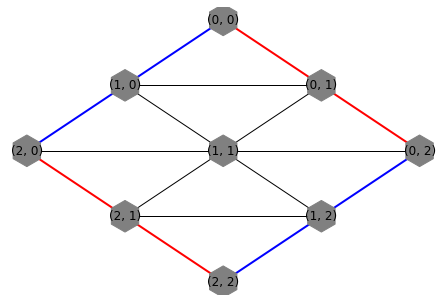

In [7]:
h.display_board()

In [13]:
visited = []
to_visit = [mcts.root]

while len(to_visit)>0:
    current = to_visit.pop()
    visited.append(current)
    to_visit+= current.get_children()
    
len(visited)


2

In [36]:
e = Hex((6,6))
e.set_encoder(HexEncoder(padding=2))
%time e.copy()

CPU times: user 118 µs, sys: 39 µs, total: 157 µs
Wall time: 130 µs


In [37]:
%time e.copy()

CPU times: user 116 µs, sys: 5 µs, total: 121 µs
Wall time: 127 µs


In [38]:
def t(env):
    for i in range(10000):
        env.copy()
cProfile.run('t(e)', sort='cumtime')

         480004 function calls (460004 primitive calls) in 0.676 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.676    0.676 {built-in method builtins.exec}
        1    0.000    0.000    0.676    0.676 <string>:1(<module>)
        1    0.012    0.012    0.676    0.676 <ipython-input-38-8204ba2ccf93>:1(t)
30000/10000    0.117    0.000    0.664    0.000 hex.py:99(copy)
    20000    0.038    0.000    0.487    0.000 encoder.py:252(copy)
    30000    0.194    0.000    0.371    0.000 hex.py:55(__init__)
    50000    0.033    0.000    0.213    0.000 <__array_function__ internals>:2(copy)
    50000    0.027    0.000    0.171    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    50000    0.017    0.000    0.144    0.000 function_base.py:714(copy)
    50000    0.127    0.000    0.127    0.000 {built-in method numpy.array}
    20000    0.018    0.000    0.102    0.000

In [74]:
h = Hex((6,6))
%time h.copy()

CPU times: user 294 µs, sys: 11 µs, total: 305 µs
Wall time: 310 µs


In [75]:
a = np.arange(36).reshape((6,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [76]:
%time np.copy(a)

CPU times: user 25 µs, sys: 5 µs, total: 30 µs
Wall time: 35 µs


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [77]:
%time np.array(a, copy=True)

CPU times: user 25 µs, sys: 7 µs, total: 32 µs
Wall time: 38.9 µs


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])